In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [9]:
data=pd.read_csv('sonar.csv',names=range(0,61))

In [10]:
data=pd.DataFrame(data=data)
data

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [13]:
x=data.drop(columns=[60])
y=pd.DataFrame(data[60])

In [14]:
pca=PCA(n_components=10)

In [16]:
x=pca.fit_transform(x)
x=pd.DataFrame(data=x)

In [17]:
x.shape

(208, 10)

In [18]:
x

,0,1,2,3,4,5,6,7,8,9
0,0.576093,0.319393,-0.387291,-0.378009,-0.243780,-0.156243,-0.427736,0.074832,-0.024347,0.318054
1,-0.970667,1.018039,0.834156,0.107423,0.286070,0.178684,-0.260332,0.385600,-0.004030,-0.072529
2,-0.325887,0.874209,0.246015,0.863031,0.069110,-0.300833,-0.412807,0.075321,-0.010855,-0.438559
3,0.852035,0.690863,-0.013390,-0.110257,-0.554050,0.397968,0.492569,-0.220460,0.537003,-0.436795
4,-0.064756,0.222968,0.638601,0.140432,0.135854,0.052881,-0.386558,0.066549,-0.117006,-0.419277
...,...,...,...,...,...,...,...,...,...,...
203,0.041781,-1.031644,0.265669,0.021516,-0.015439,0.097304,0.003784,0.177926,-0.027908,-0.264179
204,0.219149,-1.153807,0.203619,0.045836,0.183272,0.012770,0.078507,0.264831,0.070749,-0.303296
205,0.297733,-1.151860,0.250096,-0.057702,0.163566,0.015275,0.045792,0.225904,0.072130,-0.313044
206,-0.045761,-0.995970,0.199677,-0.066516,-0.147227,-0.084600,0.031038,0.067444,0.025771,-0.171120


In [38]:
x.describe()

,0,1,2,3,4,5,6,7,8,9
count,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02
mean,2.088340e-17,-2.135044e-16,1.741395e-17,3.189222e-17,-6.224988e-17,1.347747e-17,2.935686e-18,1.267683e-18,1.067522e-17,3.896456e-17
std,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00
min,-1.881147e+00,-1.937652e+00,-2.427990e+00,-2.086231e+00,-2.418170e+00,-2.136988e+00,-2.793591e+00,-2.985219e+00,-2.976944e+00,-2.889309e+00
25%,-7.740114e-01,-7.605097e-01,-6.097435e-01,-6.762599e-01,-6.792760e-01,-6.465517e-01,-6.422082e-01,-6.254368e-01,-5.000794e-01,-5.440459e-01
50%,5.755131e-02,-9.309679e-02,-3.556914e-02,-6.246574e-02,2.944598e-02,-1.731487e-02,-6.225997e-02,2.778720e-02,7.439882e-02,2.097206e-02
75%,6.622914e-01,6.670395e-01,5.540114e-01,6.127481e-01,6.301426e-01,5.930598e-01,4.588576e-01,5.514083e-01,5.699370e-01,5.935856e-01
max,2.285976e+00,2.488428e+00,2.839965e+00,2.759031e+00,2.588238e+00,2.914103e+00,3.364120e+00,3.018362e+00,2.982233e+00,3.223811e+00


In [19]:
y

,60
0,R
1,R
2,R
3,R
4,R
...,...
203,M
204,M
205,M
206,M


In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
y=pd.DataFrame(data=y)
y

,0
0,1
1,1
2,1
3,1
4,1
...,...
203,0
204,0
205,0
206,0


In [22]:
data.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
       ...   
56    float64
57    float64
58    float64
59    float64
60     object
Length: 61, dtype: object

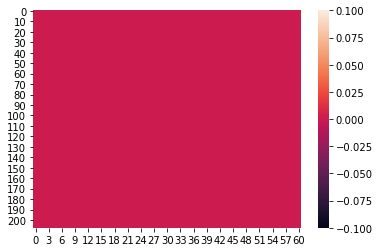

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(data.isnull())

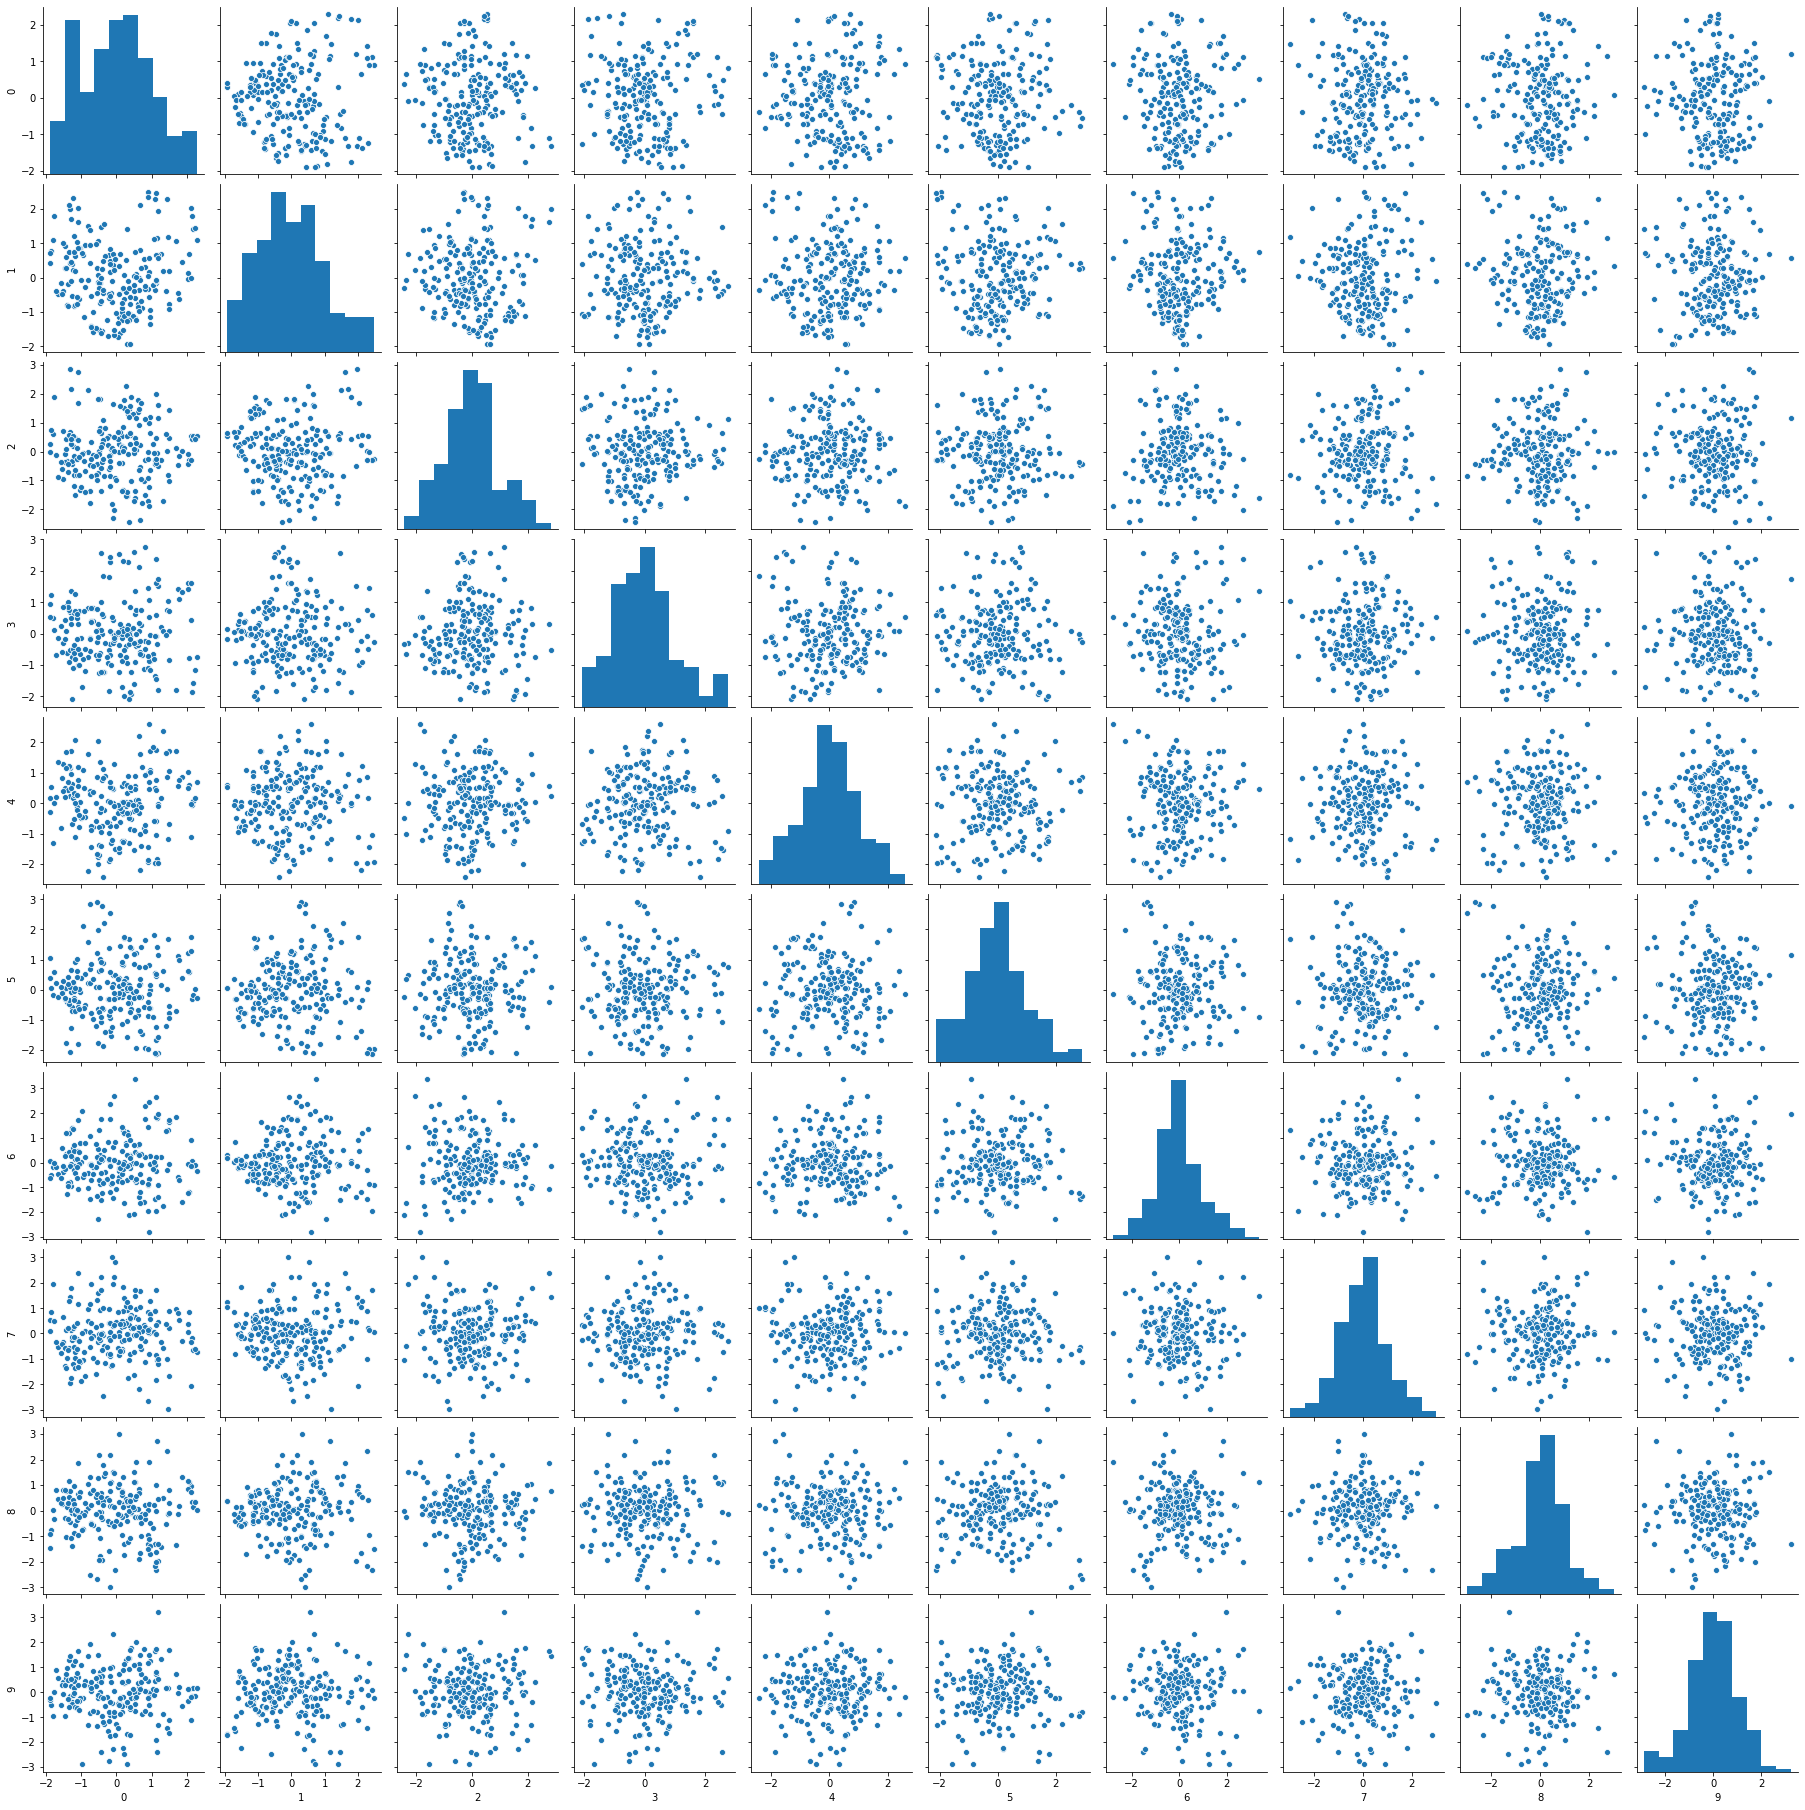

In [41]:
sns.pairplot(x)

In [34]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x=pd.DataFrame(x)

In [35]:
x.skew()

0    0.177056
1    0.403361
2    0.179856
3    0.437246
4   -0.081498
5    0.260802
6    0.407128
7    0.058413
8   -0.223131
9   -0.266651
dtype: float64

In [85]:
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    lg=LogisticRegression()
    rf=RandomForestClassifier()
    sv=SVC()
    dtc=DecisionTreeClassifier()
    gn=GaussianNB()
    model=[lg,rf,sv,dtc,gn]
    minimum_accuracy_score=0.8
    for m in model:
        m.fit(x_train,y_train)
        m.score(x_train,y_train)
        y_pred=m.predict(x_test)
        accuracy=accuracy_score(y_test,y_pred)
        if accuracy>minimum_accuracy_score:
            final_r_state=r_state
            print('max accuracy score corresponding to',final_r_state,'is',accuracy,'for',m)

max accuracy score corresponding to 42 is 0.9047619047619048 for SVC()
max accuracy score corresponding to 45 is 0.8809523809523809 for RandomForestClassifier()
max accuracy score corresponding to 45 is 0.8809523809523809 for SVC()
max accuracy score corresponding to 45 is 0.8095238095238095 for GaussianNB()
max accuracy score corresponding to 46 is 0.8571428571428571 for RandomForestClassifier()
max accuracy score corresponding to 46 is 0.9047619047619048 for SVC()
max accuracy score corresponding to 46 is 0.8333333333333334 for DecisionTreeClassifier()
max accuracy score corresponding to 47 is 0.8333333333333334 for SVC()
max accuracy score corresponding to 50 is 0.8333333333333334 for RandomForestClassifier()
max accuracy score corresponding to 50 is 0.9047619047619048 for SVC()
max accuracy score corresponding to 51 is 0.8809523809523809 for RandomForestClassifier()
max accuracy score corresponding to 51 is 0.8571428571428571 for SVC()
max accuracy score corresponding to 51 is 0.85

In [106]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=55)

In [107]:
x_train.shape

(166, 10)

In [108]:
x_test.shape

(42, 10)

In [109]:
y_train.shape

(166, 1)

In [110]:
y_test.shape

(42, 1)

In [111]:
lg=LogisticRegression()

In [112]:
lg.fit(x_train,y_train)
print(lg.score(x_train,y_train))
pred=lg.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.7710843373493976
0.8333333333333334
[[24  3]
 [ 4 11]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.87        27
           1       0.79      0.73      0.76        15

    accuracy                           0.83        42
   macro avg       0.82      0.81      0.82        42
weighted avg       0.83      0.83      0.83        42



In [113]:
from sklearn.model_selection import GridSearchCV
dtc=DecisionTreeClassifier()
grid_param={'criterion':['gini','entropy']}
gd_sr=GridSearchCV(estimator=dtc,param_grid=grid_param,scoring='accuracy',cv=5)
gd_sr.fit(x,y)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'criterion': 'entropy'}
0.4954703832752613


In [114]:
from sklearn.model_selection import GridSearchCV
svc=SVC()
parameters={'kernel':['linear','rbf'],'C':[1,10]}
clf=GridSearchCV(svc,parameters,scoring='accuracy',cv=5)
clf.fit(x,y)
print(sorted(clf.cv_results_.keys()))
print(clf.best_params_)
best_result=clf.best_score_
print(best_result)

['mean_fit_time', 'mean_score_time', 'mean_test_score', 'param_C', 'param_kernel', 'params', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'std_fit_time', 'std_score_time', 'std_test_score']
{'C': 10, 'kernel': 'rbf'}
0.6642276422764228


In [115]:
from sklearn.model_selection import GridSearchCV
rf=RandomForestClassifier()
grid_param={'n_estimators':range(1,100)}
gd_sr=GridSearchCV(estimator=rf,param_grid=grid_param,scoring='accuracy',cv=5)
gd_sr.fit(x,y)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'n_estimators': 13}
0.6110336817653891


In [116]:
sv=SVC(kernel='rbf',C=10)
dtc=DecisionTreeClassifier(criterion='entropy')
rf=RandomForestClassifier(n_estimators=13)
gn=GaussianNB()

model=[sv,dtc,rf,gn]

for m in model:
    m.fit(x_train,y_train)
    print(m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print('Confusion matrix of',m,'is:')
    print(confusion_matrix(y_test,predm))
    print('Classification report of',m,'is:')
    print(classification_report(y_test,predm))
    print('\n')

0.9939759036144579
Accuracy score of SVC(C=10) is:
0.9047619047619048
Confusion matrix of SVC(C=10) is:
[[24  3]
 [ 1 14]]
Classification report of SVC(C=10) is:
              precision    recall  f1-score   support

           0       0.96      0.89      0.92        27
           1       0.82      0.93      0.87        15

    accuracy                           0.90        42
   macro avg       0.89      0.91      0.90        42
weighted avg       0.91      0.90      0.91        42



1.0
Accuracy score of DecisionTreeClassifier(criterion='entropy') is:
0.8571428571428571
Confusion matrix of DecisionTreeClassifier(criterion='entropy') is:
[[26  1]
 [ 5 10]]
Classification report of DecisionTreeClassifier(criterion='entropy') is:
              precision    recall  f1-score   support

           0       0.84      0.96      0.90        27
           1       0.91      0.67      0.77        15

    accuracy                           0.86        42
   macro avg       0.87      0.81      0.8

In [117]:
from sklearn.model_selection import cross_val_score
dtcscores=cross_val_score(dtc,x,y,cv=5)
print(dtcscores)
print(dtcscores.mean(),dtcscores.std())

[0.47619048 0.5952381  0.35714286 0.65853659 0.3902439 ]
0.4954703832752613 0.11586458836662455


In [118]:
from sklearn.model_selection import cross_val_score
svscores=cross_val_score(sv,x,y,cv=5)
print(svscores)
print(svscores.mean(),svscores.std())

[0.54761905 0.73809524 0.54761905 0.75609756 0.73170732]
0.6642276422764228 0.09554594589040183


In [119]:
from sklearn.model_selection import cross_val_score
rfscores=cross_val_score(rf,x,y,cv=5)
print(rfscores)
print(rfscores.mean(),rfscores.std())

[0.42857143 0.71428571 0.38095238 0.70731707 0.29268293]
0.5047619047619046 0.17380454696901468


In [120]:
import joblib
joblib.dump(sv,'filesv.pkl')
homefile=joblib.load('filesv.pkl')
homefile.predict(x_test)

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0],
      dtype=int64)

# Conclusion - From above data analysis,modeling and hyperparameter tuning it was observed that both SVC and Random Forest Classifier model were performing best amongst others but after cross validation I found out that the accuracy score of SVC is greater than the Random Forest, so I saved SVC model to the external pickel file for future prediction of result. 